## Function warp_polar_5D
Transform an image with up to 5 dimensions into polar coordinates. Optionally returns axes projections, like cylinder projection (projection over radius axis).

$$ image\_polar(c, t, z, \phi, \rho) = warp\_polar\_5D(image(c, t, z, y, x)) $$

In [1]:
from biapol_utilities.transform import warp_polar_5D
from biapol_utilities.data import hourglass
import numpy as np
from skimage.io import imread
import napari
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

### Create synthetic 3D data (z, x, y)

In [2]:
shape = (3,7,7)
center = (3,3)
radius = 2
grid = np.meshgrid(range(shape[1]), range(shape[2]))
circle = (grid[0] - center[0])**2 + (grid[1] - center[1])**2
circle_shell = (circle <=radius**2) & (circle > (radius-1)**2)
cylinder = np.broadcast_to(circle_shell, shape).astype(int)

Plot and print data:

[[[0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 1 0 1 0 0]
  [0 1 0 0 0 1 0]
  [0 0 1 0 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 1 0 1 0 0]
  [0 1 0 0 0 1 0]
  [0 0 1 0 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 1 0 1 0 0]
  [0 1 0 0 0 1 0]
  [0 0 1 0 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]]]


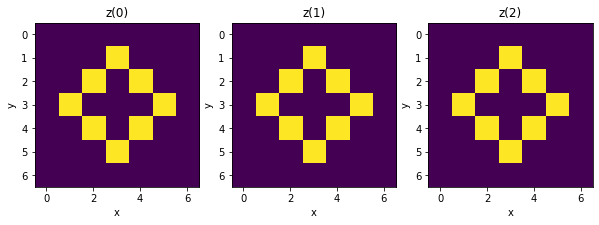

In [3]:
fig, ax = plt.subplots(1,3,figsize=[10,10])
for i in range(len(ax)):
    ax[i].imshow(cylinder[i])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    title = 'z(' + str(i) + ')'
    ax[i].set_title(title)
print(cylinder)

### Apply warp_polar_5D to synthetic data

Transform it into (z, angle, radius) and plot every 45°:

In [4]:
cylinder_polar = warp_polar_5D(cylinder, radius=5)

Plot and print data:

[[[0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]]

 [[0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]]

 [[0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]
  [0.   0.   1.   0.   0.  ]
  [0.   0.5  0.34 0.   0.  ]]]


C:\Users\mazo260d\Anaconda3\envs\metroid-napari\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


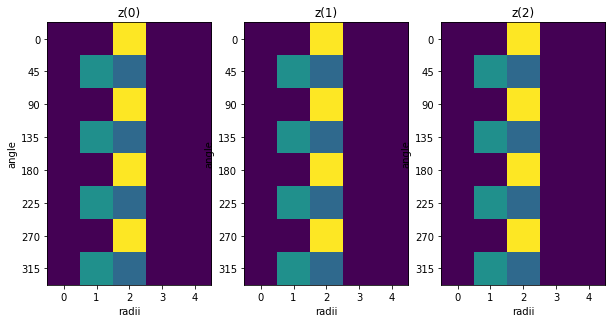

In [5]:
fig, ax = plt.subplots(1,3,figsize=[10,10])
for i in range(len(ax)):
    ax[i].imshow(cylinder_polar[i,::45,:])
    ax[i].set_xlabel('radii')
    ax[i].set_ylabel('angle')
    ax[i].set_yticklabels([0,0,45,90,135,180,225,270,315,360])
    title = 'z(' + str(i) + ')'
    ax[i].set_title(title)
print(cylinder_polar[:,::45,:])

### Load synthetic 4D data (time, z, y, x)

Visualize it with napari. Data depicts a 3D hourglass with a half ring droplet that falls over time.

In [6]:
image = hourglass()
viewer = napari.Viewer()
viewer.add_image(image)

<Image layer 'image' at 0x1ca2a8b3b88>

Get screenshots from napari viewer:

In [7]:
screenshot_image = viewer.screenshot()

### Apply warp_polar_5D to synthetic data

Transform it into (time, z, angle, radius) and plot every 10°:

In [8]:
image_polar = warp_polar_5D(image)

In [9]:
viewer.add_image(image_polar[:,:,::10,:])

<Image layer 'Image' at 0x1ca4c4efd88>

Get screenshots from napari viewer:

In [10]:
screenshot_image_polar = viewer.screenshot()

 Display image (x | y , z) view and polar image (radius | angle , z) view:

[]

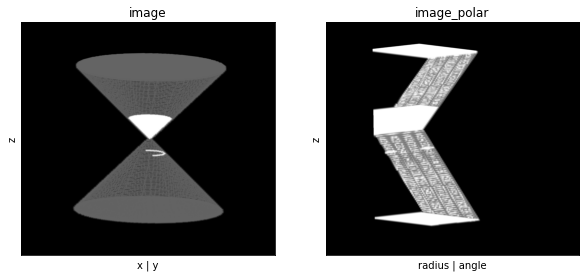

In [11]:
fig, ax = plt.subplots(1,2,figsize=[10,10])
ax[0].imshow(screenshot_image)
ax[0].set_xlabel('x | y')
ax[0].set_ylabel('z')
ax[0].set_title('image')
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].imshow(screenshot_image_polar)
ax[1].set_xlabel('radius | angle')
ax[1].set_ylabel('z')
ax[1].set_title('image_polar')
ax[1].set_yticks([])
ax[1].set_xticks([])

### Apply warp_polar_5D and get cylinder projection
Transform it into (time, z, angle) and plot one time point (time=10):

In [12]:
cylinder_projection = warp_polar_5D(image, project = 'r')

Plot data:

Text(0.5, 1.0, 'time = 10')

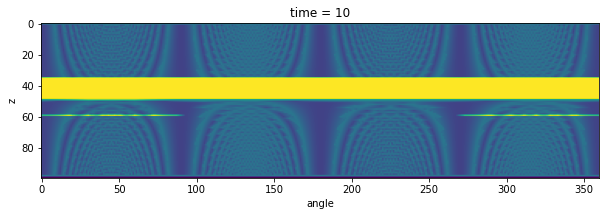

In [13]:
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(cylinder_projection[10])
ax.set_xlabel('angle')
ax.set_ylabel('z')
ax.set_title('time = 10')